# Функции потерь


#### 1. (R)MSE ((Root) Mean Squared Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N (y_n - \hat{y}_n)^2$$

#### 2. MAE (Mean Absolute Error)

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_n^N |y_n - \hat{y}_n|$$


**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_n^N (y_n - \hat{y}_n)^2}{\sum\limits_n^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_n^N |y_n - \hat{y}_n|}{\sum\limits_n^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_n^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_n^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

# Искусственные нейронные сети

Считываем набор данных цифр MNIST.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import numpy as np

In [2]:
digits = load_digits()

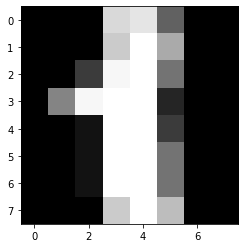

In [3]:
img = digits.images
plt.imshow(img[1], cmap=plt.cm.Greys_r);

In [4]:
X = img.reshape(-1, 64)
y = digits.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.reshape(1, -1)

Персептрон из библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier).

In [5]:
from sklearn.neural_network import MLPClassifier

In [361]:
model = MLPClassifier((128, 64), activation='relu')

In [362]:
train_y

array([1, 5, 0, ..., 2, 8, 0])

In [363]:
model.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [364]:
y_hat = model.predict(test_x)

In [365]:
y_hat

array([1, 9, 4, 5, 5, 4, 6, 6, 5, 3, 1, 2, 2, 7, 4, 5, 6, 4, 6, 0, 6, 1,
       0, 6, 9, 3, 3, 0, 4, 1, 4, 1, 2, 1, 3, 0, 2, 0, 6, 9, 3, 9, 5, 2,
       1, 4, 0, 1, 4, 7, 9, 9, 6, 1, 8, 2, 5, 0, 5, 9, 4, 8, 6, 3, 2, 7,
       5, 5, 9, 1, 1, 9, 7, 9, 1, 8, 2, 4, 7, 4, 1, 6, 6, 2, 8, 6, 0, 8,
       2, 8, 8, 6, 1, 6, 8, 1, 7, 4, 5, 5, 0, 5, 9, 2, 6, 8, 9, 6, 0, 3,
       4, 0, 3, 4, 8, 3, 1, 9, 9, 4, 7, 6, 9, 0, 5, 2, 6, 1, 7, 4, 1, 0,
       8, 3, 7, 1, 3, 2, 7, 9, 8, 9, 2, 3, 5, 6, 1, 3, 1, 6, 8, 9, 5, 4,
       8, 3, 2, 7, 5, 9, 2, 7, 6, 7, 2, 3, 2, 8, 4, 8, 3, 0, 7, 7, 3, 8,
       9, 9, 8, 0, 3, 5, 3, 4, 6, 2, 3, 6, 0, 4, 7, 7, 1, 8, 5, 4, 8, 5,
       5, 6, 2, 3, 3, 8, 2, 9, 5, 7, 3, 0, 1, 4, 4, 4, 8, 3, 7, 2, 3, 0,
       8, 3, 6, 0, 4, 6, 3, 8, 5, 0, 1, 7, 5, 2, 6, 4, 6, 6, 4, 3, 6, 8,
       5, 5, 8, 3, 1, 2, 4, 5, 7, 4, 7, 8, 3, 2, 8, 0, 3, 7, 5, 9, 4, 9,
       3, 3, 8, 1, 7, 8, 4, 1, 7, 5, 3, 4, 9, 9, 6, 1, 3, 3, 3, 1, 3, 5,
       0, 6, 4, 5, 6, 6, 0, 0, 9, 9, 9, 2, 0, 2, 7,

In [366]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  1, 31]])

In [367]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.97222222, 1.        , 1.        , 0.975     ,
        0.94444444, 0.97297297, 1.        , 0.96969697, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91428571, 0.91176471]),
 array([1.        , 0.98591549, 1.        , 1.        , 0.98734177,
        0.97142857, 0.98630137, 1.        , 0.94117647, 0.95384615]),
 array([32, 35, 35, 47, 39, 34, 36, 33, 35, 34]))

In [368]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9833333333333333

In [37]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_backprop',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_partial_fit',
 '_predict',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'beta_1',
 'beta_2',
 'early_stopping',
 'epsilon',
 'fit',
 'get_params',
 'hidden_layer_sizes',
 'learning_ra

In [239]:
len(model.coefs_), len(model.coefs_[0])

(3, 64)

In [376]:
model.coefs_[0][:, 10].reshape((8, -1))

array([[-3.61047115e-04,  6.82383477e-08, -3.35580641e-03,
         4.10279976e-02, -5.29807778e-02, -1.01026908e-01,
        -1.28125074e-12,  6.20409165e-05],
       [ 3.99671037e-04, -1.21226659e-12, -1.77193330e-02,
         4.03372272e-02, -1.43856173e-01, -9.74830613e-02,
        -3.27070842e-03,  5.10893961e-04],
       [ 7.14595151e-05,  3.26888675e-02, -1.24170868e-01,
        -1.24974547e-03, -7.06546826e-03,  1.53197840e-01,
        -2.87188207e-12,  2.77389003e-13],
       [-2.93796762e-07,  1.22580850e-01, -6.94314953e-02,
         1.23171173e-01, -5.88514028e-02,  1.02602869e-01,
        -1.05466531e-01, -3.82677341e-04],
       [-8.68085447e-07,  9.71840908e-02,  1.70385071e-02,
        -7.48480014e-02, -5.36987651e-02, -1.30958999e-01,
        -4.28452120e-02,  5.00351366e-04],
       [-1.10774637e-08,  1.22686278e-01,  1.21035401e-02,
        -3.48196376e-03,  1.89765413e-02, -5.89808628e-02,
        -6.43448481e-03, -1.05262900e-15],
       [ 3.96034607e-16, -3.515589

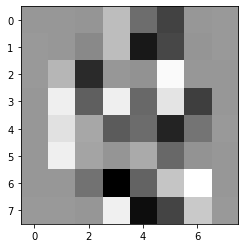

In [375]:
plt.imshow(model.coefs_[0][:, 10].reshape((8, -1)), cmap=plt.cm.Greys_r);

Теперь попробуем сверточные и рекуррентные сети из Keras

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

Хорошо, сперва полносвязанная сеть.

In [49]:
model = keras.Sequential()
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(10, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001), 
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )


In [50]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(10)
    y2[y] = 1
    train_y2.append(y2)
    
test_y2 = []
for y in test_y:
    y2 = np.zeros(10)
    y2[y] = 1
    test_y2.append(y2)
    
train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [51]:
train_y2

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
model.fit(train_x, train_y2, epochs=200, batch_size=5)

Epoch 1/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9986
Epoch 2/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.9986
Epoch 3/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9986
Epoch 4/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9986
Epoch 5/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2158 - accuracy: 0.9986
Epoch 6/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.9986
Epoch 7/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.9986
Epoch 8/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9986
Epoch 9/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.9986
Epoch 10/200
288/288 [==============================] - 0s 1ms/step - loss: 0.2145 - accura

288/288 [==============================] - 0s 970us/step - loss: 0.1968 - accuracy: 0.9986
Epoch 82/200
288/288 [==============================] - 0s 958us/step - loss: 0.1965 - accuracy: 0.9986
Epoch 83/200
288/288 [==============================] - 0s 913us/step - loss: 0.1963 - accuracy: 0.9986
Epoch 84/200
288/288 [==============================] - 0s 938us/step - loss: 0.1961 - accuracy: 0.9986
Epoch 85/200
288/288 [==============================] - 0s 927us/step - loss: 0.1959 - accuracy: 0.9986
Epoch 86/200
288/288 [==============================] - 0s 921us/step - loss: 0.1956 - accuracy: 0.9986
Epoch 87/200
288/288 [==============================] - 0s 965us/step - loss: 0.1954 - accuracy: 0.9986
Epoch 88/200
288/288 [==============================] - 0s 949us/step - loss: 0.1952 - accuracy: 0.9986
Epoch 89/200
288/288 [==============================] - 0s 977us/step - loss: 0.1949 - accuracy: 0.9986
Epoch 90/200
288/288 [==============================] - 0s 1ms/step - loss: 0

In [56]:
y_hat = model.predict(test_x)

In [57]:
y_hat

array([[4.13314812e-03, 2.38624215e-02, 3.56294885e-02, ...,
        3.69930058e-03, 9.00788009e-01, 1.90361403e-02],
       [1.21553756e-04, 2.67375424e-03, 1.28211017e-04, ...,
        8.22108879e-04, 1.49995249e-04, 1.64841273e-04],
       [1.84071643e-04, 8.01856723e-03, 2.56361030e-02, ...,
        9.13866388e-04, 1.70533941e-03, 1.16740353e-03],
       ...,
       [9.58786786e-01, 1.77397204e-04, 6.63055340e-04, ...,
        1.08884939e-03, 2.21349057e-02, 5.13525167e-03],
       [9.24167864e-04, 1.03215885e-03, 4.41006012e-03, ...,
        5.92186989e-04, 9.89929974e-01, 6.29164511e-04],
       [9.91101265e-01, 6.44308893e-05, 4.40113770e-04, ...,
        4.36382979e-05, 8.94484459e-04, 4.81645082e-04]], dtype=float32)

In [58]:
test_y

array([[8, 4, 3, 5, 2, 2, 0, 4, 1, 4, 6, 5, 5, 6, 2, 4, 0, 9, 0, 5, 2, 3,
        2, 2, 6, 1, 3, 9, 2, 0, 3, 4, 6, 3, 6, 7, 3, 8, 2, 5, 9, 1, 9, 7,
        2, 5, 0, 8, 9, 8, 1, 4, 6, 0, 6, 7, 3, 7, 8, 3, 0, 4, 9, 7, 7, 9,
        9, 8, 4, 2, 2, 4, 6, 9, 4, 6, 0, 5, 0, 1, 5, 5, 7, 2, 4, 1, 4, 2,
        0, 6, 0, 3, 8, 7, 4, 1, 7, 8, 8, 6, 4, 7, 8, 5, 6, 5, 1, 5, 7, 5,
        8, 9, 7, 2, 5, 1, 4, 3, 2, 5, 3, 5, 9, 9, 7, 9, 8, 6, 4, 5, 0, 7,
        4, 6, 0, 9, 3, 1, 2, 9, 4, 0, 3, 0, 8, 7, 7, 5, 0, 1, 5, 9, 6, 6,
        7, 5, 6, 4, 9, 8, 0, 5, 4, 8, 7, 6, 1, 6, 0, 6, 0, 1, 5, 3, 2, 6,
        7, 6, 5, 3, 7, 5, 7, 2, 7, 7, 9, 5, 8, 2, 9, 5, 3, 4, 1, 1, 1, 3,
        0, 5, 2, 8, 1, 6, 7, 1, 1, 9, 7, 1, 6, 7, 0, 6, 2, 9, 9, 6, 5, 7,
        1, 2, 6, 8, 4, 1, 0, 2, 0, 9, 5, 4, 2, 1, 9, 6, 7, 6, 4, 3, 2, 5,
        0, 0, 6, 2, 4, 6, 1, 9, 0, 9, 1, 1, 8, 4, 6, 4, 6, 3, 3, 5, 4, 9,
        9, 5, 2, 0, 8, 5, 4, 4, 6, 9, 1, 1, 4, 7, 9, 5, 2, 5, 6, 9, 3, 3,
        9, 5, 1, 1, 3, 2, 9, 7, 9, 7, 

In [59]:
y_hat = [np.argmax(y) for y in y_hat]

In [60]:
y_hat

[8,
 4,
 3,
 5,
 2,
 2,
 0,
 4,
 1,
 4,
 6,
 5,
 5,
 6,
 2,
 4,
 0,
 9,
 0,
 5,
 2,
 3,
 2,
 2,
 6,
 1,
 3,
 9,
 2,
 0,
 3,
 4,
 6,
 3,
 6,
 7,
 3,
 8,
 2,
 5,
 9,
 1,
 3,
 7,
 2,
 5,
 0,
 8,
 9,
 8,
 1,
 4,
 6,
 0,
 6,
 4,
 3,
 7,
 8,
 3,
 0,
 4,
 9,
 7,
 7,
 9,
 9,
 8,
 4,
 2,
 2,
 4,
 6,
 3,
 4,
 6,
 0,
 5,
 0,
 1,
 5,
 5,
 7,
 2,
 4,
 1,
 4,
 2,
 0,
 6,
 0,
 3,
 8,
 7,
 4,
 1,
 7,
 8,
 8,
 6,
 4,
 7,
 8,
 5,
 6,
 5,
 1,
 5,
 7,
 5,
 8,
 9,
 7,
 2,
 5,
 1,
 4,
 3,
 2,
 5,
 3,
 5,
 9,
 9,
 7,
 9,
 8,
 6,
 4,
 5,
 0,
 7,
 4,
 6,
 0,
 9,
 3,
 1,
 2,
 9,
 4,
 5,
 3,
 0,
 8,
 7,
 7,
 5,
 0,
 1,
 5,
 9,
 6,
 6,
 7,
 5,
 6,
 4,
 9,
 8,
 0,
 5,
 4,
 8,
 7,
 6,
 1,
 6,
 0,
 6,
 0,
 1,
 5,
 3,
 2,
 6,
 7,
 6,
 5,
 3,
 7,
 5,
 7,
 2,
 7,
 7,
 9,
 5,
 8,
 2,
 9,
 5,
 3,
 4,
 1,
 1,
 1,
 3,
 0,
 5,
 2,
 8,
 1,
 6,
 7,
 1,
 1,
 9,
 7,
 1,
 6,
 7,
 0,
 6,
 2,
 9,
 9,
 6,
 5,
 7,
 1,
 2,
 6,
 8,
 4,
 1,
 0,
 2,
 0,
 9,
 5,
 4,
 2,
 1,
 9,
 6,
 7,
 6,
 4,
 3,
 2,
 5,
 0,
 0,
 6,
 2,
 4,
 6,
 1,
 9,


In [61]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[33,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  2, 37]])

In [62]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 1.        , 1.        , 0.93103448, 0.97560976,
        0.97560976, 1.        , 1.        , 0.86842105, 1.        ]),
 array([0.97058824, 1.        , 1.        , 0.9       , 1.        ,
        1.        , 1.        , 0.97222222, 1.        , 0.90243902]),
 array([0.98507463, 1.        , 1.        , 0.91525424, 0.98765432,
        0.98765432, 1.        , 0.98591549, 0.92957746, 0.94871795]),
 array([34, 34, 32, 30, 40, 40, 40, 36, 33, 41]))

In [63]:
accuracy_score(test_y.reshape(-1), y_hat)

0.975

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


Теперь сверточные сети.

In [81]:
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))


In [82]:
train_x3 = train_x.reshape(-1, 64, 1)
train_y3 = train_y2.reshape(-1, 10, 1)
test_x3 = test_x.reshape(-1, 64, 1)
test_y3 = test_y2.reshape(-1, 10, 1)

In [83]:
model.fit(train_x3, train_y3, epochs=20)#, validation_data=(test_x3, test_y3))

Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 1.2457
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2872
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1959
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1105
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0723
Epoch 7/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 8/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0430
Epoch 9/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0367
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 11/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0208
Epoch 12/20
45/45 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 13/20
45/45 [==============================

In [84]:
y_hat = model.predict(test_x3)

In [85]:
y_hat = [np.argmax(y) for y in y_hat]

In [86]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 32]])

In [87]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([1.        , 0.93877551, 1.        , 1.        , 0.97142857,
        1.        , 1.        , 1.        , 0.84848485, 0.91428571]),
 array([1.        , 0.9787234 , 0.97435897, 0.88      , 1.        ,
        0.94444444, 1.        , 1.        , 0.90322581, 0.94117647]),
 array([1.        , 0.95833333, 0.98701299, 0.93617021, 0.98550725,
        0.97142857, 1.        , 1.        , 0.875     , 0.92753623]),
 array([42, 47, 39, 25, 34, 36, 37, 35, 31, 34]))

In [88]:
accuracy_score(test_y.reshape(-1), y_hat)

0.9666666666666667

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  128       
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  3104      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  19210     
Total params: 22,442
Trainable params: 22,442
Non-trainable params: 0
_________________________________________________________________


LSTM

In [106]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64)))
# model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.), 
               keras.losses.MeanSquaredError(reduction='sum'),
               metrics=[keras.metrics.Precision()])



In [107]:
model.fit(train_x3, train_y3, epochs=20)

Epoch 1/20
45/45 [==============================] - 2s 42ms/step - loss: 2.7477 - precision_1: 0.0000e+00
Epoch 2/20
45/45 [==============================] - 2s 43ms/step - loss: 2.0372 - precision_1: 0.8847
Epoch 3/20
45/45 [==============================] - 2s 39ms/step - loss: 1.4847 - precision_1: 0.8974
Epoch 4/20
45/45 [==============================] - 2s 43ms/step - loss: 1.1605 - precision_1: 0.8813
Epoch 5/20
45/45 [==============================] - 2s 47ms/step - loss: 0.9592 - precision_1: 0.8901
Epoch 6/20
45/45 [==============================] - 2s 45ms/step - loss: 0.8144 - precision_1: 0.8902
Epoch 7/20
45/45 [==============================] - 2s 46ms/step - loss: 0.7928 - precision_1: 0.8919
Epoch 8/20
45/45 [==============================] - 2s 46ms/step - loss: 0.6399 - precision_1: 0.9191
Epoch 9/20
45/45 [==============================] - 2s 45ms/step - loss: 0.5709 - precision_1: 0.9235
Epoch 10/20
45/45 [==============================] - 3s 59ms/step - loss: 0.57

In [108]:
y_hat = model.predict(test_x3)

In [109]:
y_hat = [np.argmax(y) for y in y_hat]

In [110]:
confusion_matrix(test_y.reshape(-1), y_hat)

array([[5, 9, 3, 3, 2, 2, 1, 2, 0, 3],
       [2, 6, 3, 3, 5, 2, 2, 8, 2, 6],
       [3, 6, 2, 2, 5, 9, 6, 1, 8, 2],
       [2, 3, 4, 1, 3, 4, 5, 4, 2, 6],
       [4, 4, 1, 2, 5, 4, 1, 3, 3, 4],
       [6, 3, 5, 3, 3, 5, 9, 4, 4, 1],
       [4, 3, 5, 1, 2, 4, 2, 3, 2, 6],
       [8, 3, 6, 1, 2, 2, 1, 3, 3, 2],
       [5, 5, 6, 4, 2, 2, 5, 5, 4, 2],
       [6, 7, 3, 0, 4, 4, 3, 4, 5, 0]])

In [111]:
precision_recall_fscore_support(test_y.reshape(-1), y_hat)

(array([0.11111111, 0.12244898, 0.05263158, 0.05      , 0.15151515,
        0.13157895, 0.05714286, 0.08108108, 0.12121212, 0.        ]),
 array([0.16666667, 0.15384615, 0.04545455, 0.02941176, 0.16129032,
        0.11627907, 0.0625    , 0.09677419, 0.1       , 0.        ]),
 array([0.13333333, 0.13636364, 0.04878049, 0.03703704, 0.15625   ,
        0.12345679, 0.05970149, 0.08823529, 0.10958904, 0.        ]),
 array([30, 39, 44, 34, 31, 43, 32, 31, 40, 36]))

In [112]:
accuracy_score(test_y.reshape(-1), y_hat)

0.09166666666666666

In [113]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  33792     
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  1290      
Total params: 35,082
Trainable params: 35,082
Non-trainable params: 0
_________________________________________________________________
